In [49]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# read in data from csv file Day-ahead Prices_ES.csv
data = pd.read_csv('./datasets/Day-ahead Prices_ES.csv')
data

,MTU (CET/CEST),Day-ahead Price [EUR/MWh],Currency,BZN|ES
0,01.01.2022 00:00 - 01.01.2022 01:00,145.86,EUR,NaN
1,01.01.2022 01:00 - 01.01.2022 02:00,114.90,EUR,NaN
2,01.01.2022 02:00 - 01.01.2022 03:00,113.87,EUR,NaN
3,01.01.2022 03:00 - 01.01.2022 04:00,97.80,EUR,NaN
4,01.01.2022 04:00 - 01.01.2022 05:00,97.80,EUR,NaN
...,...,...,...,...
8756,31.12.2022 19:00 - 31.12.2022 20:00,18.11,EUR,NaN
8757,31.12.2022 20:00 - 31.12.2022 21:00,7.60,EUR,NaN
8758,31.12.2022 21:00 - 31.12.2022 22:00,3.69,EUR,NaN
8759,31.12.2022 22:00 - 31.12.2022 23:00,1.88,EUR,NaN


In [51]:
# check data types
data.dtypes

MTU (CET/CEST)                object
Day-ahead Price [EUR/MWh]    float64
Currency                      object
BZN|ES                       float64
dtype: object

In [52]:
data.isnull().sum()

MTU (CET/CEST)                  0
Day-ahead Price [EUR/MWh]       1
Currency                        1
BZN|ES                       8761
dtype: int64

In [53]:
data[data['Currency'].isnull()]

,MTU (CET/CEST),Day-ahead Price [EUR/MWh],Currency,BZN|ES
2042,27.03.2022 02:00 - 27.03.2022 03:00,NaN,NaN,NaN


In [54]:
data.ffill().isnull().sum() # forward fill, fill with previous value. Other options: bfill, backfill and fillna with a value

MTU (CET/CEST)                  0
Day-ahead Price [EUR/MWh]       0
Currency                        0
BZN|ES                       8761
dtype: int64

In [55]:
data.isnull().sum()

MTU (CET/CEST)                  0
Day-ahead Price [EUR/MWh]       1
Currency                        1
BZN|ES                       8761
dtype: int64

In [56]:
# opcion 1:
data = data.ffill()
# opcion 2:
data.ffill(inplace=True)

In [57]:
data.ffill().iloc[2042,:]

MTU (CET/CEST)               27.03.2022 02:00 - 27.03.2022 03:00
Day-ahead Price [EUR/MWh]                                 242.01
Currency                                                     EUR
BZN|ES                                                       NaN
Name: 2042, dtype: object

In [58]:
def clean_data(df):
    # fill missing values with previous values 
    df = df.ffill()

    # rename price column
    df = df.rename(columns={'Day-ahead Price [EUR/MWh]': 'Price'})

    # split the column MTU (CET/CEST) into two columns
    df[['Date', 'CET/CEST']] = df['MTU (CET/CEST)'].str.split('-', expand=True)

    # convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

    # set Date column as index
    df = df.set_index('Date')

    # drop columns that are not needed for this analysis
    df = df.drop(['MTU (CET/CEST)', 'CET/CEST', 'Currency', 'BZN|ES'], axis=1)

    return df

In [59]:
def clean_data_chain(df):
    df = (df.ffill()  # fill missing values with previous values 
            .rename(columns={'Day-ahead Price [EUR/MWh]': 'Price'}) # rename price column
            .assign(Date = lambda x: pd.to_datetime((x['MTU (CET/CEST)']
                                                     .str
                                                     .split('-', expand=True)[0]
                                                     ),
                                                     dayfirst=True)
                    ) # get the date from the MTU (CET/CEST) first column and change the data type of the date column to datetime
            .set_index('Date') # set Date column as index
            .drop(['MTU (CET/CEST)', 'Currency', 'BZN|ES'], axis=1) # drop columns that are not needed for this analysis
    )
    
    return df

In [60]:
df = clean_data(data)
#df.dtypes
#df.isnull().sum()
df
#data

,Price
Date,
2022-01-01 00:00:00,145.86
2022-01-01 01:00:00,114.90
2022-01-01 02:00:00,113.87
2022-01-01 03:00:00,97.80
2022-01-01 04:00:00,97.80
...,...
2022-12-31 19:00:00,18.11
2022-12-31 20:00:00,7.60
2022-12-31 21:00:00,3.69


<Axes: xlabel='Date'>

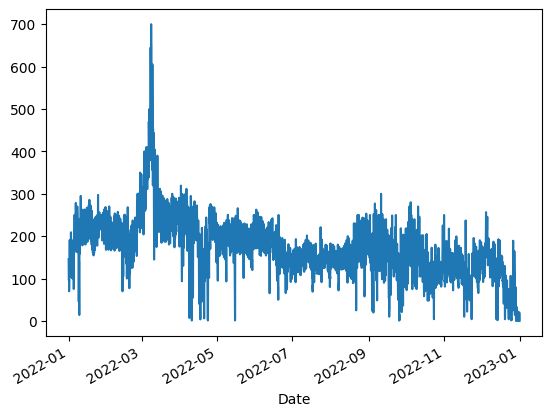

In [61]:
# plot the price column
df.Price.plot()

<Axes: xlabel='Date'>

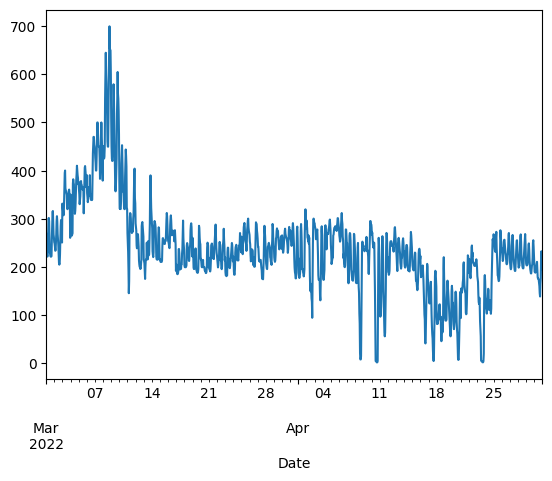

In [62]:
# get the price for January 2022
df['2022-03-01':'2022-04-30'].Price.plot() # or df.loc['2022-01-01':'2022-01-31', 'Price']

Text(0, 0.5, 'Price [EUR/MWh]')

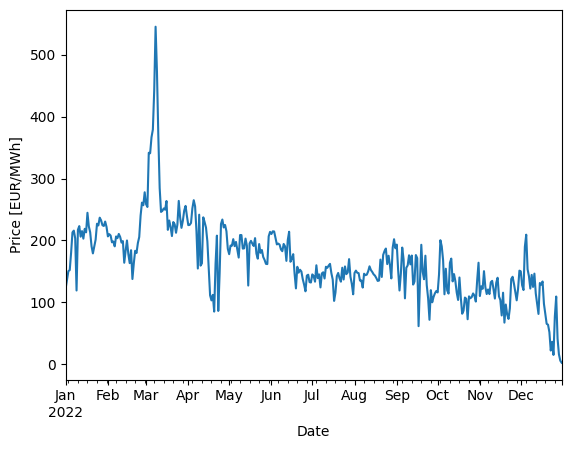

In [63]:
# dayly average price
df.resample('D').Price.mean().plot()
plt.ylabel('Price [EUR/MWh]')


Text(0, 0.5, 'Price [EUR/MWh]')

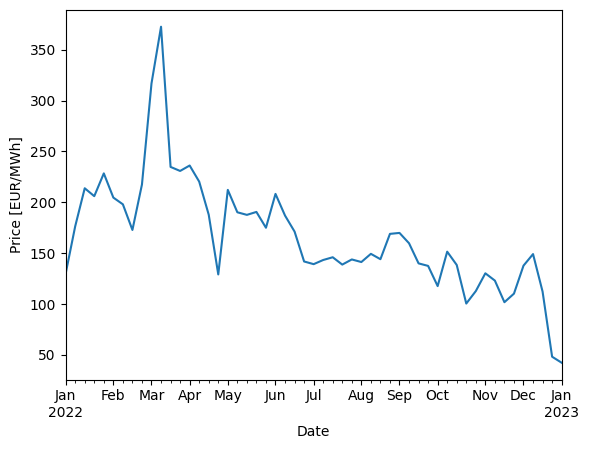

In [64]:
# weekly average price
df.resample('W').Price.mean().plot()
plt.ylabel('Price [EUR/MWh]')

Text(0, 0.5, 'Price [EUR/MWh]')

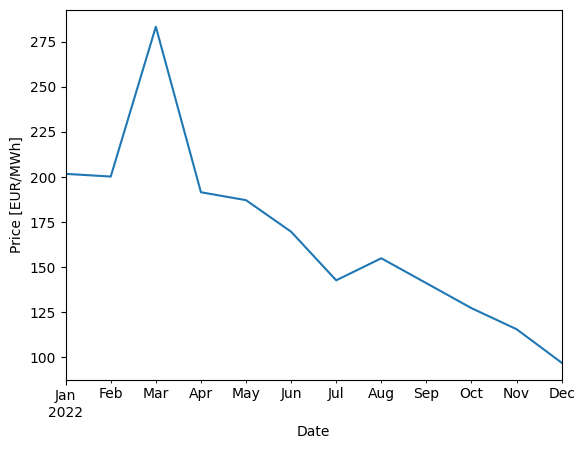

In [65]:
# monthly average price
df.resample('M').Price.mean().plot()
plt.ylabel('Price [EUR/MWh]')

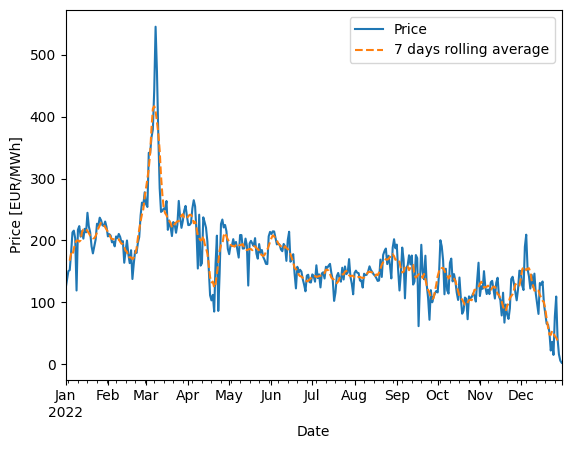

In [66]:
# daily average price
df.resample('D').Price.mean().plot()
# 7-days rolling average price
df.resample('D').Price.mean().rolling(7, center=True).mean().plot(style='--', label='7 days rolling average')
plt.ylabel('Price [EUR/MWh]')
plt.legend()

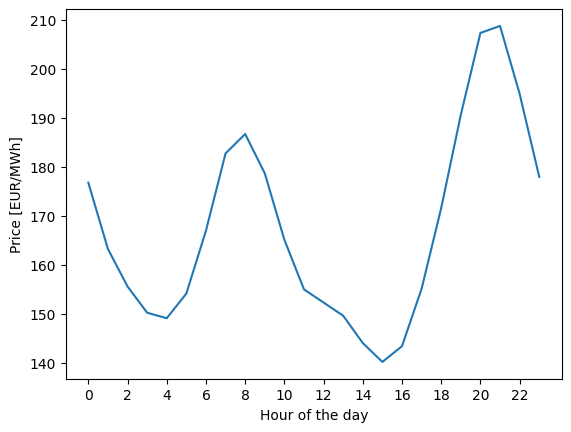

In [67]:
# groupby hour of the day
df.groupby(df.index.hour).Price.mean().plot()
plt.ylabel('Price [EUR/MWh]')
plt.xlabel('Hour of the day')
plt.xticks(range(0, 24, 2))
plt.show()

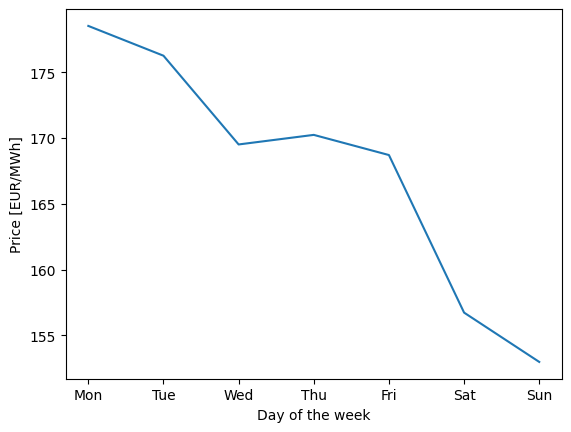

In [68]:
# groupby day of the week
df.groupby(df.index.dayofweek).Price.mean().plot()
plt.ylabel('Price [EUR/MWh]')
plt.xlabel('Day of the week')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

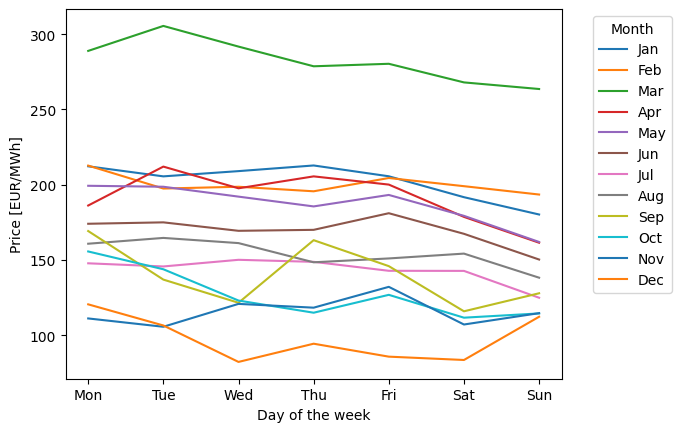

In [69]:
# groupby dayoftheweek and month
df.groupby([df.index.dayofweek, df.index.month]).Price.mean().unstack().plot()
plt.ylabel('Price [EUR/MWh]')
plt.xlabel('Day of the week')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
            'Nov', 'Dec'],
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            title='Month'
            )
plt.show()

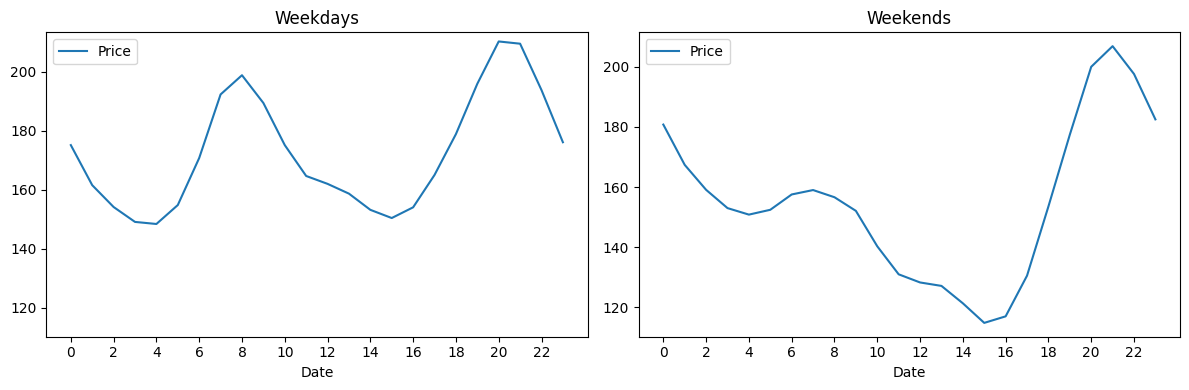

In [70]:
by_weekday = df.groupby(df.index.dayofweek).mean()
weekend    = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
by_hour    = df.groupby([weekend, df.index.hour]).mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
by_hour.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                            xticks=range(0, 24, 2))
by_hour.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                            xticks=range(0, 24, 2))
# set the min y limit to the min y-limit of both axes
ax[0].set_ylim(bottom=min(ax[0].get_ylim()[0], ax[1].get_ylim()[0]))
# set the max y limit to the max y-limit of both axes
ax[0].set_ylim(top=max(ax[0].get_ylim()[1], ax[1].get_ylim()[1]))
plt.tight_layout()
plt.show()



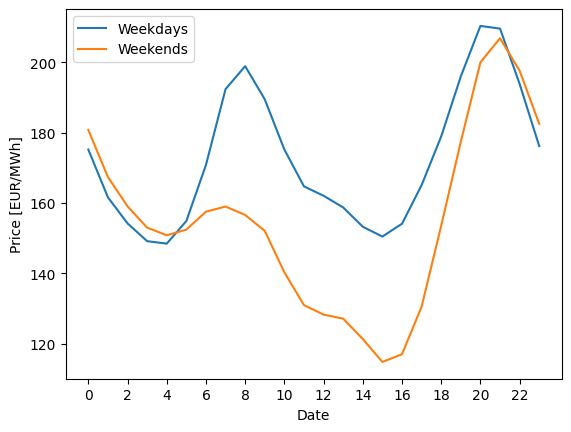

In [71]:
by_hour.loc['Weekday'].Price.plot(label='Weekdays', xticks=range(0, 24, 2))
by_hour.loc['Weekend'].Price.plot(label='Weekends', xticks=range(0, 24, 2))
plt.ylabel('Price [EUR/MWh]')
plt.legend()